# Time Series with Pandas (Practice)

Kris Barbier

## Tasks:

First, load the data.

1. Convert the date column to datetime dtype. Double-check the result. Is it what you expected? If not, be sure to correct it by entering the appropriate format!
2. Set the date column as the index. Inspect the new index of your dataframe. What type of index is it? Does it have a frequency?
3. Filter out only the required data:
- Keep only data from the year 2000 or later.
- Keep only the following features:
    - precipitation
    - mean_temp
    - min_temp
    - max_temp
    - snow_depth
4. Answer the following questions using .idxmax() and .idxmin(), print statements, and the .strftime() method. Use f-strings to print the following statements (with the blanks filled in):

a) "The lowest temperature of {max temp} degrees occurred on {date as "MonthName 2-digit-day, 4-digit year. } which was a {day of the week}."

b) "The highest daily precipitation of {max preciptation} inches occurred on {date as "MonthName 2-digit-day, 4-digit year. } which was a {day of the week}."

In [14]:
#Imports
import pandas as pd
import datetime as dt
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read in data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv"
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [3]:
#Look at samples to determine datetime format
df['date'].sample(n=10).sort_index()

793      19810304
1296     19820720
2231     19850209
7447     19990523
7466     19990611
8254     20010807
11212    20090912
13905    20170126
14111    20170820
14860    20190908
Name: date, dtype: int64

- Need to use the format yyyy-mm-dd.

In [4]:
#Convert date column to datetime dtype
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%d')

In [5]:
#Set date as index
df = df.set_index('date')
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


- This index has a frequency of 1 day between rows.

In [6]:
#Filter out data after 2000 and keep only specified columns
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]
df


,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


- a) "The lowest temperature of {max temp} degrees occurred on {date as "MonthName 2-digit-day, 4-digit year. } which was a {day of the week}."

In [7]:
#Find lowest temp day
date_min_temp = df['min_temp'].idxmax()
min_temp = df['min_temp'].max()

print(f"The lowest temperature of {min_temp} degrees occurred on {date_min_temp.strftime('%B %d%, %Y')} which was a {date_min_temp.strftime('%A')}.")

The lowest temperature of 22.3 degrees occurred on July 20, 2016 which was a Wednesday.


- b) "The highest daily precipitation of {max preciptation} inches occurred on {date as "MonthName 2-digit-day, 4-digit year. } which was a {day of the week}."

In [8]:
#Find highest precipitation day
date_max_precip = df['precipitation'].idxmax()
max_precip = df['precipitation'].max()

print(f"The highest daily precipitation of {max_precip} inches occurred on {date_max_precip.strftime('%B %d, %Y')} which was a {date_max_precip.strftime('%A')}.")

The highest daily precipitation of 51.6 inches occurred on August 26, 2015 which was a Wednesday.


# Visualizing Time Series (Practice)

## Tasks:

1. Impute any missing values.
Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!
2. Plot the mean, min, and max temps for 2018-2020 on one figure.

Note: you may want to make a temporary DataFrame that you will use to answer this question only.

- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    - Create a wide figure (e.g. figsize=(12,3))
    - Set the title to "Daily Temperature"
    - Set the ylabel to "Degrees"
    - Customize the major xaxis ticks to:
        - Have major xaxis ticks every 1 year.
        - Use 4-digit years for the labels
        - Rotate the major ticks' labels 90 degrees.
    - Customize the minor xaxis ticks to:
        - Have minor xaxis ticks every 3 months
        - Use 3-letter month names for the labels.

3. Plot the precipitation and snow depth for 2000-2020

Note: you may want to make a temporary DataFrame that you will use to answer this question only.

- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    - Create a wide figure (e.g. figsize=(12,3))
    - With the title of "Daily Precipitation"
    - With a ylabel of "Inches"
    - Customize the major xaxis ticks to:
        - Have major xaxis ticks every 5 years.
        - Use 4-digit years for the labels
        - Rotate the major ticks' labels 45 degrees.
    - Customize the minor xaxis ticks to:
        - Have minor xaxis ticks every 3 months
        - Do not label the minor ticks on the x-axis.

In [9]:
#Explore null values
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [10]:
#Interpolate missing values in temp columns
df['mean_temp'] = df['mean_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()

In [11]:
#Verify filled values
df.isna().sum()

precipitation     390
mean_temp           0
min_temp            0
max_temp            0
snow_depth       1752
dtype: int64

In [12]:
#Fill others with 0
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [13]:
#Verify filled values
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

In [15]:
temp_cols = ['mean_temp','min_temp','max_temp']
plot_df = df.loc['2018':,temp_cols]
plot_df

,mean_temp,min_temp,max_temp
date,,,
2018-01-01,6.7,5.4,12.30
2018-01-02,7.9,3.5,10.80
2018-01-03,8.2,5.7,12.90
2018-01-04,7.7,5.5,9.35
2018-01-05,7.2,5.3,5.80
...,...,...,...
2020-12-27,7.5,7.6,7.50
2020-12-28,1.1,-1.3,3.60
2020-12-29,2.6,1.1,4.10


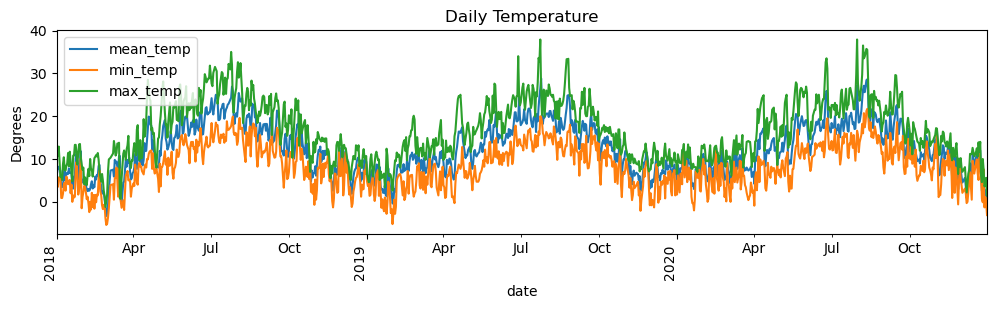

In [16]:
#Plot data
ax = plot_df.plot(figsize = (12,3))
ax.set(title = 'Daily Temperature', ylabel = 'Degrees')

#Set major ticks
major_loc = mdates.YearLocator(1)
major_fmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)

#Set minor ticks
minor_loc = mdates.MonthLocator(interval = 3)
minor_fmt = mdates.DateFormatter('%b')

ax.xaxis.set_minor_locator(minor_loc)
ax.xaxis.set_minor_formatter(minor_fmt)

#Final settings
fig = ax.get_figure()
fig.autofmt_xdate(which = 'major', rotation = 90);

In [17]:
#Get precipitation columns
precip_cols = ['precipitation','snow_depth']
plot_df  = df.loc["2000":,precip_cols]
plot_df

,precipitation,snow_depth
date,,
2000-01-01,0.0,0.0
2000-01-02,0.2,0.0
2000-01-03,6.0,0.0
2000-01-04,0.2,0.0
2000-01-05,0.8,0.0
...,...,...
2020-12-27,2.0,0.0
2020-12-28,0.2,0.0
2020-12-29,0.0,0.0


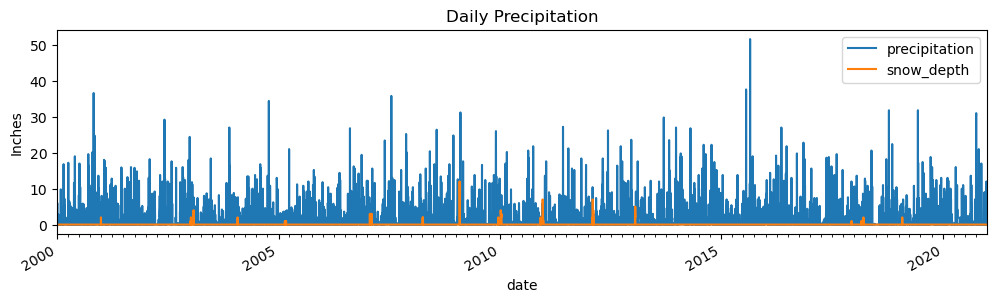

In [18]:
#Plot precipitation data
ax = plot_df.plot(figsize = (12,3))
ax.set(title = 'Daily Precipitation', ylabel = 'Inches')

#Set major ticks
major_loc = mdates.YearLocator(5)
major_fmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)

#Set minor ticks
minor_loc = mdates.MonthLocator(interval = 3)

ax.xaxis.set_minor_locator(minor_loc)

#Final settings
fig = ax.get_figure()
fig.autofmt_xdate();